In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames
import seaborn as sns
import matplotlib.pyplot as plt

# Pretty display for notebooks
%matplotlib inline

# Load Oracle Elixir dataset
try:
    rw_xl = pd.ExcelFile("NA-EU-LCK-LMS-2016-regionals-and-Worlds-match-data-v1-OraclesElixir.xlsx")
    rw_data = rw_xl.parse('data')
    print("Oracle Elixir 2016 Regional/Worlds dataset sucessfully loaded. It has {} samples with {} features each.").format(*rw_data.shape)
    msi_xl = pd.ExcelFile("MSI-2016-match-data-v1-OraclesElixir.xlsx")
    msi_data = msi_xl.parse('data')
    print("Oracle Elixir 2016 MSI dataset sucessfully loaded. It has {} samples with {} features each.").format(*msi_data.shape)
    spring_xl = pd.ExcelFile("NA-EU-LCK-LMS-2016-spring-match-data-v1-OraclesElixir.xlsx")
    spring_data = spring_xl.parse('data')
    print("Oracle Elixir 2016 Spring dataset sucessfully loaded. It has {} samples with {} features each.").format(*spring_data.shape)
    summer_xl = pd.ExcelFile("NA-EU-LCK-LMS-2016-summer-match-data-v1-OraclesElixir.xlsx")
    summer_data = summer_xl.parse('data')
    print("Oracle Elixir 2016 Summer dataset sucessfully loaded. It has {} samples with {} features each.").format(*summer_data.shape)
except:
    print("Dataset could not be loaded. Is the dataset missing?")

Oracle Elixir 2016 Regional/Worlds dataset sucessfully loaded. It has 1476 samples with 80 features each.
Oracle Elixir 2016 MSI dataset sucessfully loaded. It has 492 samples with 80 features each.
Oracle Elixir 2016 Spring dataset sucessfully loaded. It has 6948 samples with 80 features each.
Oracle Elixir 2016 Summer dataset sucessfully loaded. It has 9588 samples with 80 features each.


In [2]:
# Combining all four datasets into a superset!
all_sets = [rw_data, msi_data, spring_data, summer_data]
all_data = pd.concat(all_sets)

In [6]:
all_data.head()

gameid                                                url league  \
0  1001810023  http://matchhistory.na.leagueoflegends.com/en/...  EULCS   
1  1001810023  http://matchhistory.na.leagueoflegends.com/en/...  EULCS   
2  1001810023  http://matchhistory.na.leagueoflegends.com/en/...  EULCS   
3  1001810023  http://matchhistory.na.leagueoflegends.com/en/...  EULCS   
4  1001810023  http://matchhistory.na.leagueoflegends.com/en/...  EULCS   

    split                date week game  patchno  playerid  side   ...     \
0  2016-R 2016-09-03 10:01:02   R1    1     6.15         1  Blue   ...      
1  2016-R 2016-09-03 10:01:02   R1    1     6.15         2  Blue   ...      
2  2016-R 2016-09-03 10:01:02   R1    1     6.15         3  Blue   ...      
3  2016-R 2016-09-03 10:01:02   R1    1     6.15         4  Blue   ...      
4  2016-R 2016-09-03 10:01:02   R1    1     6.15         5  Blue   ...      

  csdat10 goldat10 oppgoldat10 gdat10 goldat15 oppgoldat15 gdat15  xpat10  \
0       2     3103        3066     37     4848        5043   -195  4413.0   
1     -13     2583        3288   -705     4432        5188   -756  2574.0   
2      -8     3089        3681   -592     4831        6057  -1226  4393.0   
3       4     3230        3111    119     4526        5184   -658  3154.0   
4       1     2070        1884    186     3091        3229   -138  2562.0   

   oppxpat10  xpdat10  
0     4402.0     11.0  
1     3643.0  -1069.0  
2     4653.0   -260.0  
3     2902.0    252.0  
4     2498.0     64.0  

[5 rows x 80 columns]

In [7]:
# Display a description of the dataset
display(all_data.describe())

gameid       patchno      playerid    gamelength        result  \
count  1.850400e+04  18504.000000  18504.000000  18504.000000  18504.000000   
mean   5.181602e+08      6.078671     29.583333     36.644617      0.500000   
std    5.279390e+08      0.124556     57.652025      8.046084      0.500014   
min    5.014100e+04      5.240000      1.000000     18.333333      0.000000   
25%    9.603040e+05      6.050000      3.750000     30.883333      0.000000   
50%    1.001460e+09      6.110000      6.500000     35.475000      0.500000   
75%    1.001720e+09      6.130000      9.250000     41.016667      1.000000   
max    2.002300e+09      6.180000    200.000000     80.466667      1.000000   

                  k             d             a     teamkills    teamdeaths  \
count  18504.000000  18504.000000  18504.000000  18504.000000  18504.000000   
mean       3.840683      3.848573      9.577713     11.522049     11.545720   
std        4.823089      4.600636     11.673684      6.417246      6.423687   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        1.000000      1.000000      3.000000      6.000000      6.000000   
50%        2.000000      3.000000      6.000000     11.000000     11.000000   
75%        5.000000      4.000000     10.000000     16.000000     16.000000   
max       35.000000     35.000000    106.000000     35.000000     35.000000   

           ...            csdat10      goldat10   oppgoldat10        gdat10  \
count      ...       18504.000000  18504.000000  18504.000000  18504.000000   
mean       ...           0.000000   5055.708820   5055.708820      0.000000   
std        ...          14.301416   4563.775309   4563.775309    619.668844   
min        ...         -78.000000   1690.000000   1690.000000  -7300.000000   
25%        ...          -8.000000   2913.000000   2913.000000   -260.250000   
50%        ...           0.000000   3254.000000   3254.000000      0.000000   
75%        ...           8.000000   3628.000000   3628.000000    260.250000   
max        ...          78.000000  20226.000000  20226.000000   7300.000000   

           goldat15   oppgoldat15        gdat15        xpat10     oppxpat10  \
count  18504.000000  18504.000000  18504.000000  18492.000000  18492.000000   
mean    7880.877216   7880.877216      0.000000   5772.856478   5772.856478   
std     7122.058228   7122.058228   1175.715107   5269.577896   5269.577896   
min     2552.000000   2552.000000 -12081.000000    663.000000    663.000000   
25%     4541.000000   4541.000000   -466.000000   2965.000000   2965.000000   
50%     5064.000000   5064.000000      0.000000   3687.000000   3687.000000   
75%     5695.250000   5695.250000    466.000000   4696.000000   4696.000000   
max    33605.000000  33605.000000  12081.000000  21245.000000  21245.000000   

            xpdat10  
count  18492.000000  
mean       0.000000  
std      640.987655  
min    -4991.000000  
25%     -334.000000  
50%        0.000000  
75%      334.000000  
max     4991.000000  

[8 rows x 66 columns]

In [8]:
# Reindexing to make results column the first column for easier analysis

cols = list(all_data.columns.values)
cols.insert(0, cols.pop(cols.index('result')))
all_data_re = all_data.reindex(columns= cols)
all_data_re.head()

result      gameid                                                url  \
0       0  1001810023  http://matchhistory.na.leagueoflegends.com/en/...   
1       0  1001810023  http://matchhistory.na.leagueoflegends.com/en/...   
2       0  1001810023  http://matchhistory.na.leagueoflegends.com/en/...   
3       0  1001810023  http://matchhistory.na.leagueoflegends.com/en/...   
4       0  1001810023  http://matchhistory.na.leagueoflegends.com/en/...   

  league   split                date week game  patchno  playerid   ...     \
0  EULCS  2016-R 2016-09-03 10:01:02   R1    1     6.15         1   ...      
1  EULCS  2016-R 2016-09-03 10:01:02   R1    1     6.15         2   ...      
2  EULCS  2016-R 2016-09-03 10:01:02   R1    1     6.15         3   ...      
3  EULCS  2016-R 2016-09-03 10:01:02   R1    1     6.15         4   ...      
4  EULCS  2016-R 2016-09-03 10:01:02   R1    1     6.15         5   ...      

  csdat10 goldat10 oppgoldat10 gdat10 goldat15 oppgoldat15 gdat15  xpat10  \
0       2     3103        3066     37     4848        5043   -195  4413.0   
1     -13     2583        3288   -705     4432        5188   -756  2574.0   
2      -8     3089        3681   -592     4831        6057  -1226  4393.0   
3       4     3230        3111    119     4526        5184   -658  3154.0   
4       1     2070        1884    186     3091        3229   -138  2562.0   

   oppxpat10  xpdat10  
0     4402.0     11.0  
1     3643.0  -1069.0  
2     4653.0   -260.0  
3     2902.0    252.0  
4     2498.0     64.0  

[5 rows x 80 columns]

In [9]:
# enconding categorical variables to floats

from sklearn import preprocessing
trans_data = all_data_re

le = preprocessing.LabelEncoder()

transformed_categories = ['url', 'date', 'league', 'split', 'week', 'game', 'patchno', 'side', 'position', 
                          'player', 'team', 'champion', 'ban1', 'ban2', 'ban3']

trans_data[transformed_categories].astype(basestring)

for cat in transformed_categories:
    le.fit(trans_data[cat])
    trans_data[cat] = le.transform(trans_data[cat])


C:\Users\Chenyu\Anaconda3\envs\python27\lib\site-packages\numpy\lib\arraysetops.py:200: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  flag = np.concatenate(([True], aux[1:] != aux[:-1]))
C:\Users\Chenyu\Anaconda3\envs\python27\lib\site-packages\numpy\lib\arraysetops.py:259: FutureWarning: numpy equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  return aux[:-1][aux[1:] == aux[:-1]]


In [10]:
trans_data[transformed_categories].head()

url  date  league  split  week  game  patchno  side  position  player  \
0  1233  1441       0      5    82     0       13     0         5     271   
1  1233  1441       0      5    82     0       13     0         1     180   
2  1233  1441       0      5    82     0       13     0         2     200   
3  1233  1441       0      5    82     0       13     0         0     249   
4  1233  1441       0      5    82     0       13     0         3     125   

   team  champion  ban1  ban2  ban3  
0    17        27    32    62     4  
1    17        21    32    62     4  
2    17        90    32    62     4  
3    17        83    32    62     4  
4    17        96    32    62     4

In [11]:
trans_data.head()

result      gameid   url  league  split  date  week  game  patchno  \
0       0  1001810023  1233       0      5  1441    82     0       13   
1       0  1001810023  1233       0      5  1441    82     0       13   
2       0  1001810023  1233       0      5  1441    82     0       13   
3       0  1001810023  1233       0      5  1441    82     0       13   
4       0  1001810023  1233       0      5  1441    82     0       13   

   playerid   ...     csdat10  goldat10  oppgoldat10  gdat10  goldat15  \
0         1   ...           2      3103         3066      37      4848   
1         2   ...         -13      2583         3288    -705      4432   
2         3   ...          -8      3089         3681    -592      4831   
3         4   ...           4      3230         3111     119      4526   
4         5   ...           1      2070         1884     186      3091   

   oppgoldat15  gdat15  xpat10  oppxpat10  xpdat10  
0         5043    -195  4413.0     4402.0     11.0  
1         5188    -756  2574.0     3643.0  -1069.0  
2         6057   -1226  4393.0     4653.0   -260.0  
3         5184    -658  3154.0     2902.0    252.0  
4         3229    -138  2562.0     2498.0     64.0  

[5 rows x 80 columns]

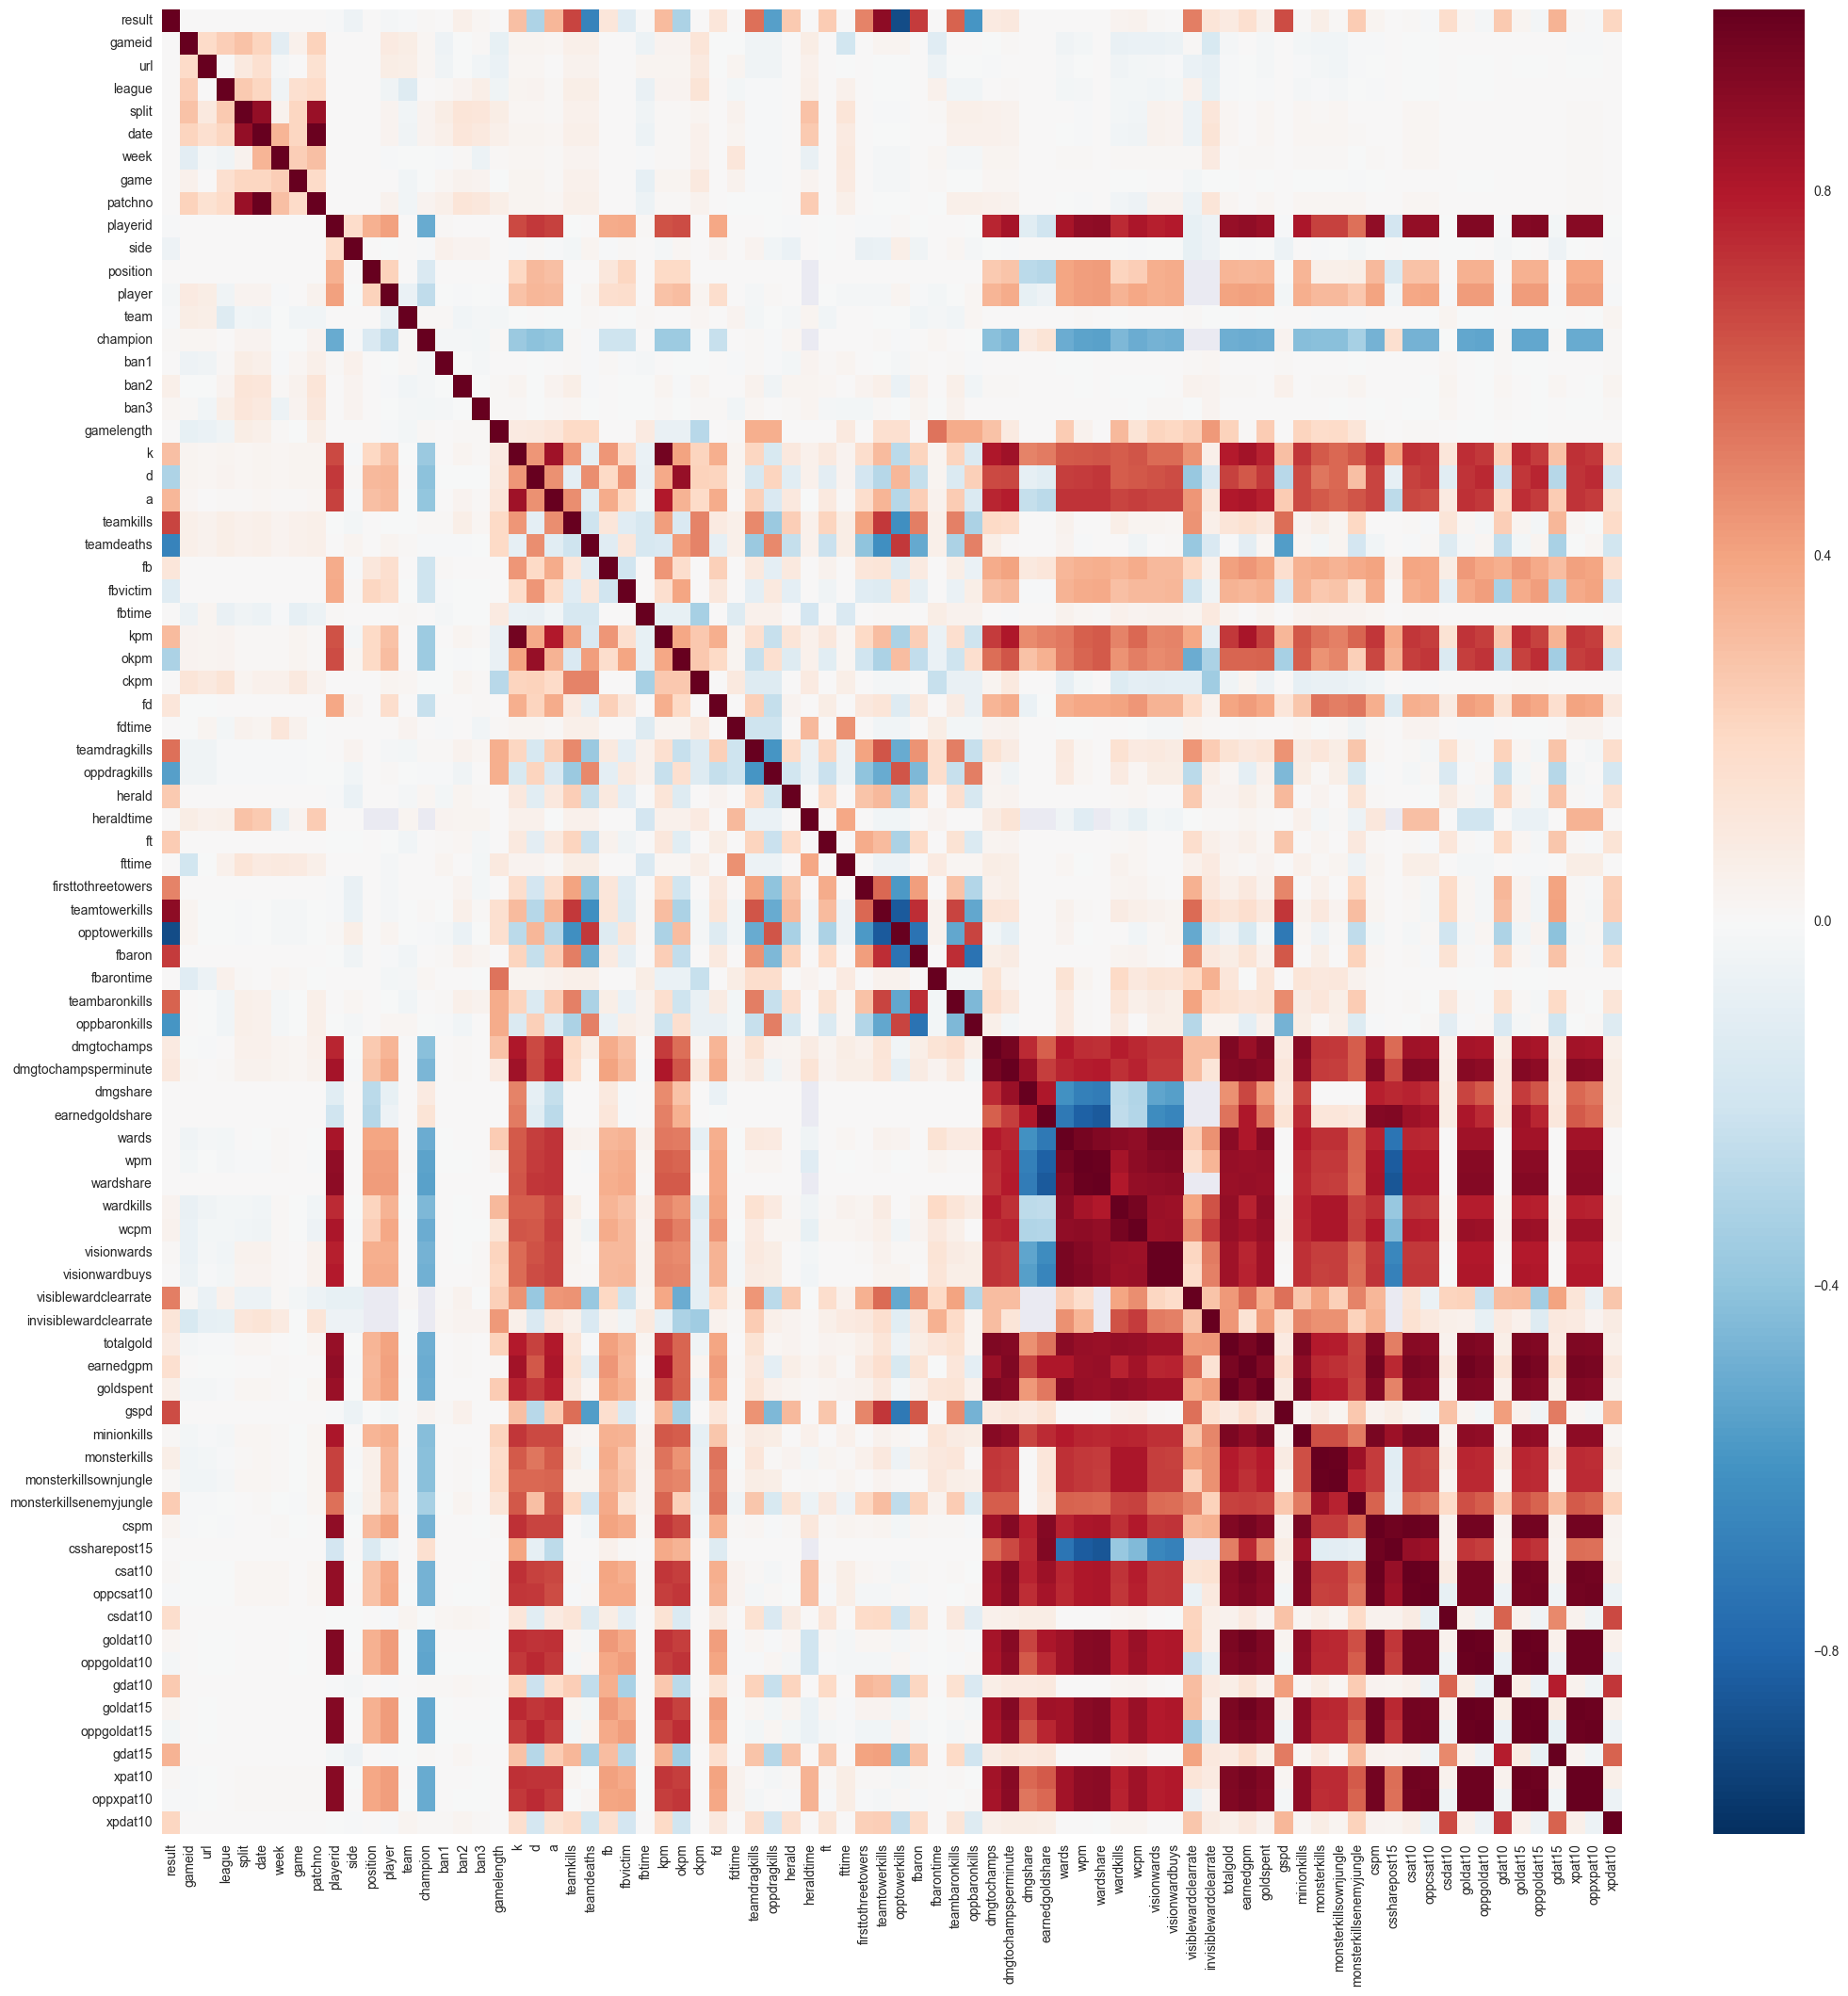

In [12]:
# Heatmap

fig, ax = plt.subplots(figsize=(25,25))
sns.heatmap(trans_data.corr(), annot = False)

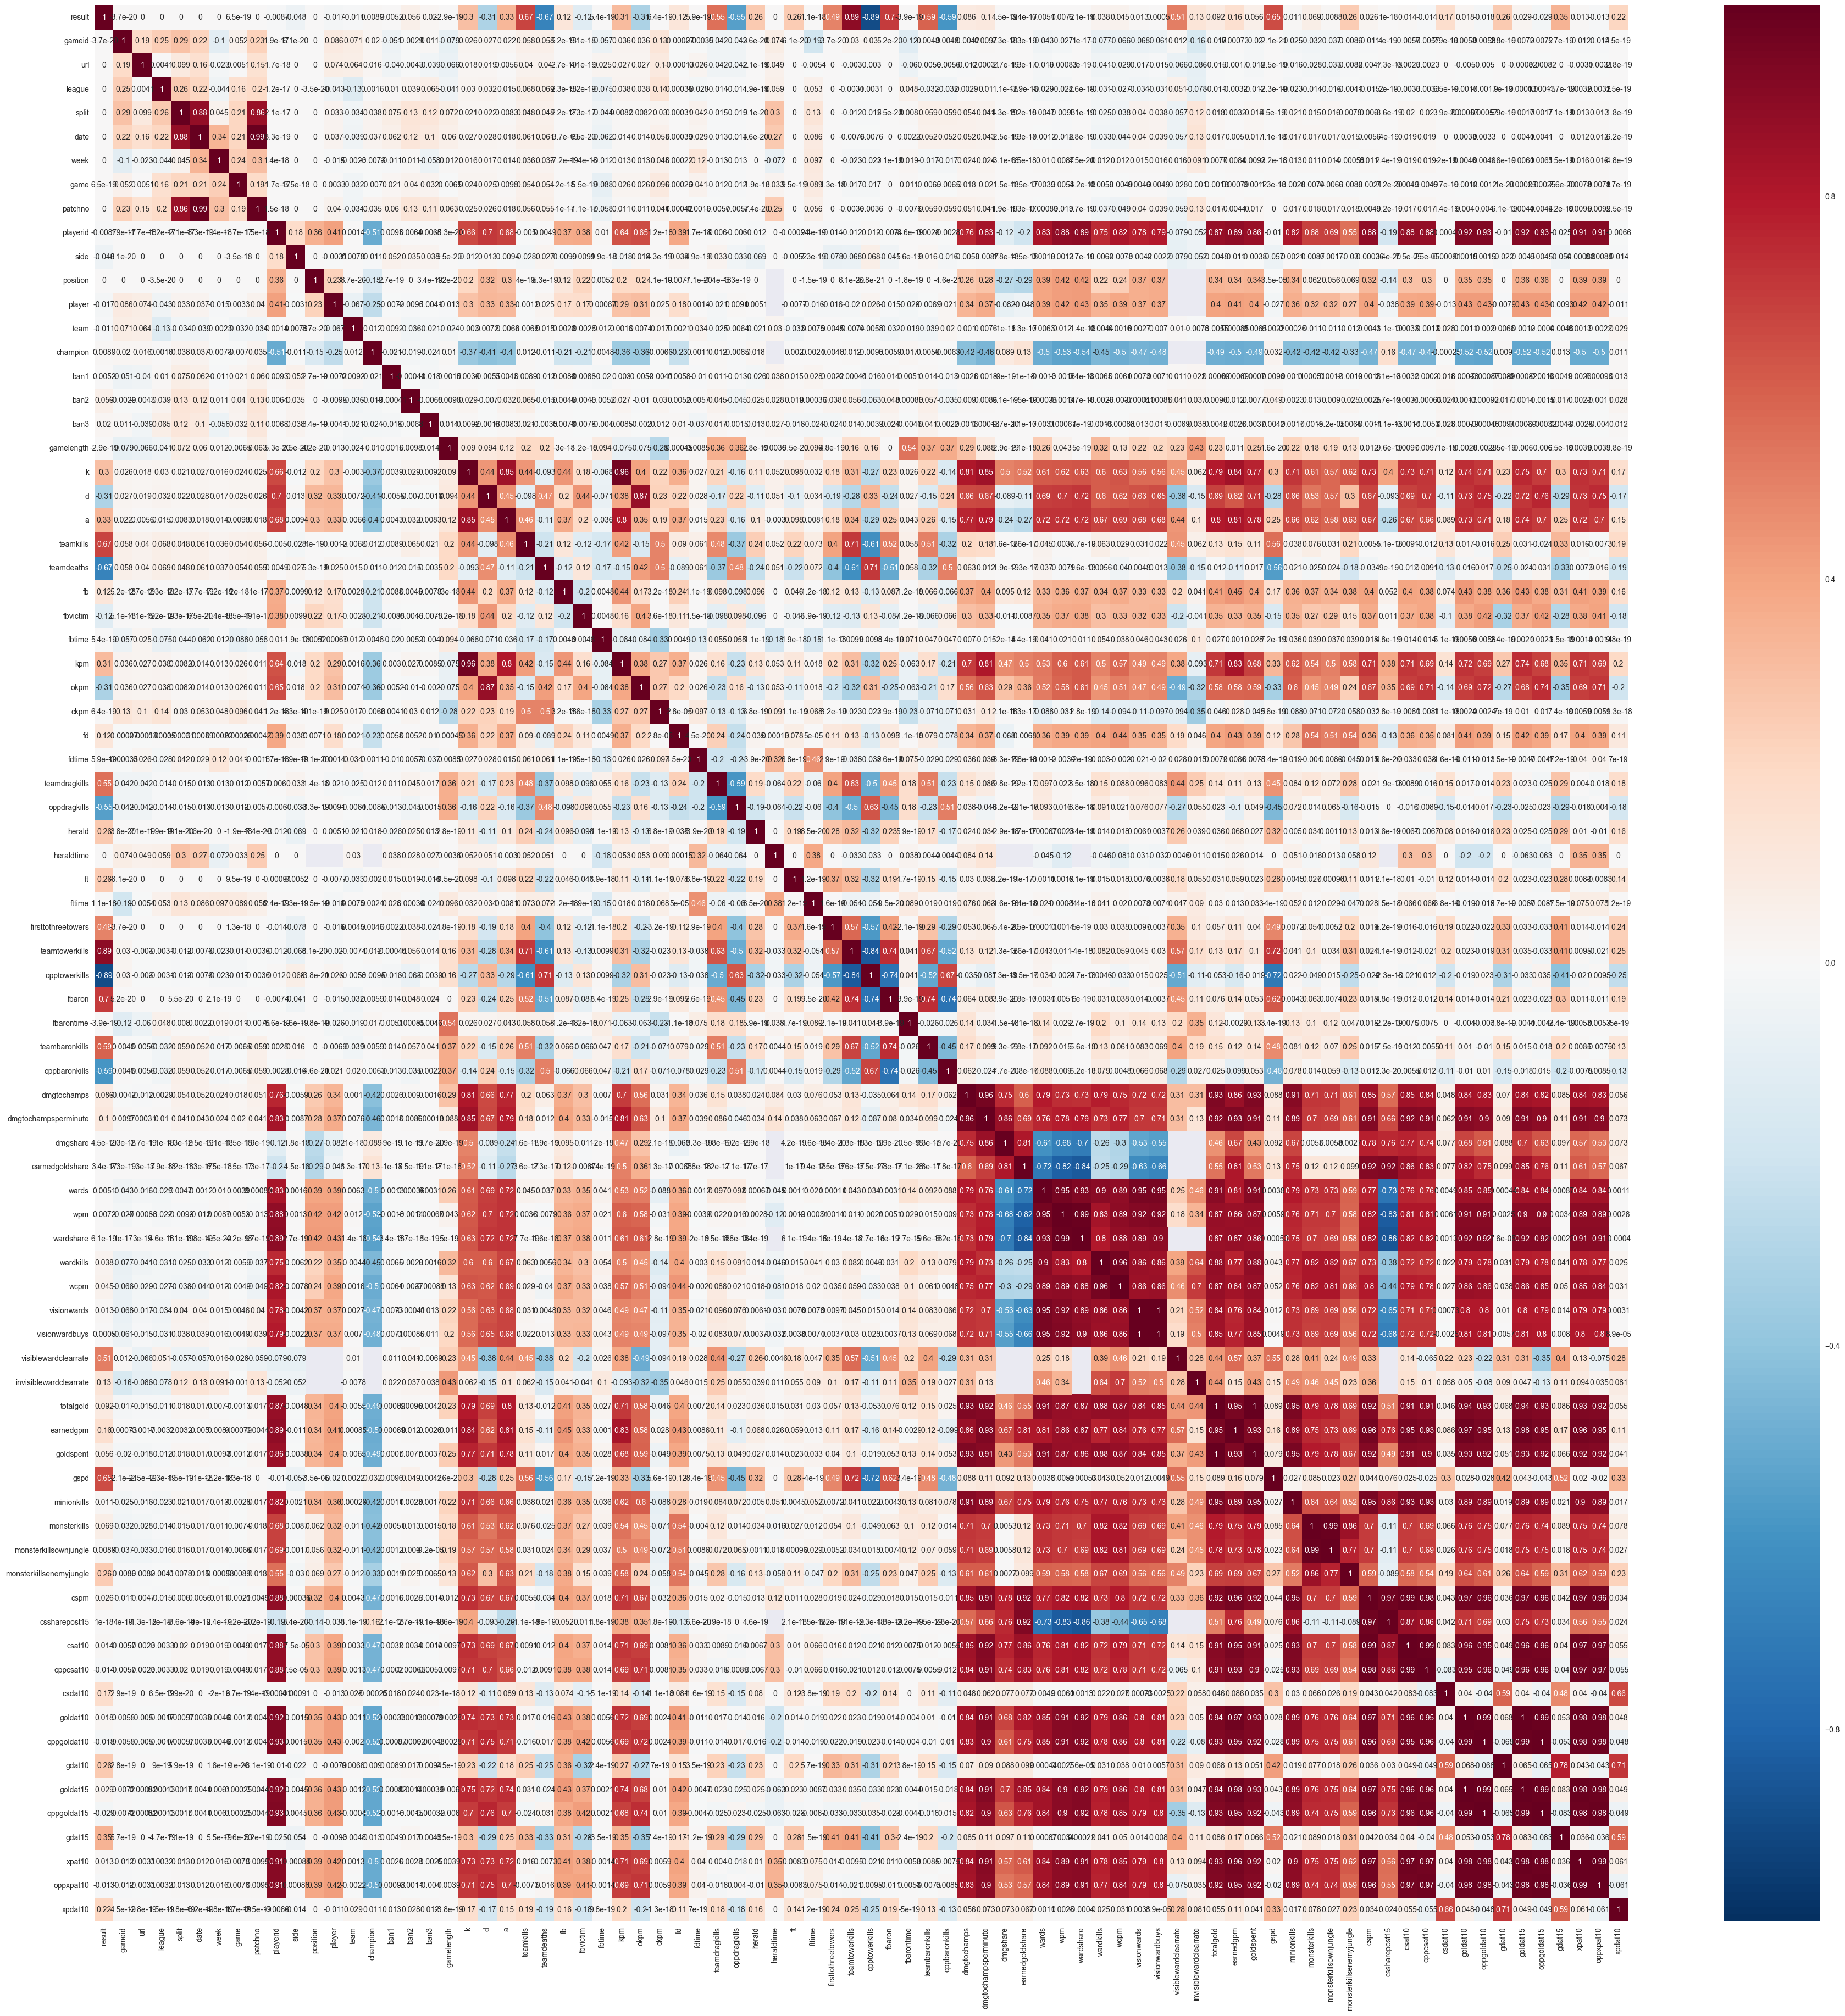

In [32]:
# larger, annotated heatmap

fig, ax = plt.subplots(figsize=(45,45))
sns.heatmap(trans_data.corr(), annot = True, annot_kws={"size": 10})

In [17]:
# finding missing data
missing = trans_data.apply(lambda x: sum(x.isnull().values), axis = 0) # For columns
drop_cols = []
for key, x in missing.iteritems():
    if x > 0:
        print key,  x
        drop_cols.append(key)

drop_cols

fbtime 6200
fdtime 12
herald 6132
heraldtime 16442
fbaron 1260
fbarontime 1260
dmgshare 3084
earnedgoldshare 3084
visiblewardclearrate 15478
invisiblewardclearrate 15420
cssharepost15 3084
xpat10 12
oppxpat10 12
xpdat10 12


[u'fbtime',
 u'fdtime',
 u'herald',
 u'heraldtime',
 u'fbaron',
 u'fbarontime',
 u'dmgshare',
 u'earnedgoldshare',
 u'visiblewardclearrate',
 u'invisiblewardclearrate',
 u'cssharepost15',
 u'xpat10',
 u'oppxpat10',
 u'xpdat10']

In [14]:
# dropping columns with missing values

dropped_data = trans_data.drop(drop_cols, 1)
dropped_data.head()

result      gameid   url  league  split  date  week  game  patchno  \
0       0  1001810023  1233       0      5  1441    82     0       13   
1       0  1001810023  1233       0      5  1441    82     0       13   
2       0  1001810023  1233       0      5  1441    82     0       13   
3       0  1001810023  1233       0      5  1441    82     0       13   
4       0  1001810023  1233       0      5  1441    82     0       13   

   playerid   ...        cspm  csat10  oppcsat10  csdat10  goldat10  \
0         1   ...    7.494677      82         80        2      3103   
1         2   ...    4.088006      31         44      -13      2583   
2         3   ...    7.877928      81         89       -8      3089   
3         4   ...    7.366927      86         82        4      3230   
4         5   ...    1.362669      12         11        1      2070   

   oppgoldat10  gdat10  goldat15  oppgoldat15  gdat15  
0         3066      37      4848         5043    -195  
1         3288    -705      4432         5188    -756  
2         3681    -592      4831         6057   -1226  
3         3111     119      4526         5184    -658  
4         1884     186      3091         3229    -138  

[5 rows x 66 columns]

result      gameid   url  league  split  date  week  game  patchno  \
0       0  1001810023  1233       0      5  1441    82     0       13   
1       0  1001810023  1233       0      5  1441    82     0       13   
2       0  1001810023  1233       0      5  1441    82     0       13   
3       0  1001810023  1233       0      5  1441    82     0       13   
4       0  1001810023  1233       0      5  1441    82     0       13   

   playerid   ...        cspm  csat10  oppcsat10  csdat10  goldat10  \
0         1   ...    7.494677      82         80        2      3103   
1         2   ...    4.088006      31         44      -13      2583   
2         3   ...    7.877928      81         89       -8      3089   
3         4   ...    7.366927      86         82        4      3230   
4         5   ...    1.362669      12         11        1      2070   

   oppgoldat10  gdat10  goldat15  oppgoldat15  gdat15  
0         3066      37      4848         5043    -195  
1         3288    -705      4432         5188    -756  
2         3681    -592      4831         6057   -1226  
3         3111     119      4526         5184    -658  
4         1884     186      3091         3229    -138  

[5 rows x 66 columns]

In [18]:
# For each feature find the data points with extreme high or low values
outlier_list = []
for feature in reindexed_data.keys():
    
    Q1 = np.percentile(reindexed_data[feature], 10)
    
    Q3 = np.percentile(reindexed_data[feature], 90)
    
    step = 2 * (Q3 - Q1)
    
    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
    outlier = reindexed_data[~((reindexed_data[feature] >= Q1 - step) & (reindexed_data[feature] <= Q3 + step))]
    outlier_list = np.append(outlier_list, outlier.index)
    display(outlier)
    

from collections import Counter
outlier_int = map(int, outlier_list)
outliers = [k for k,v in Counter(outlier_int).items() if v>1]
print '\n\nIndicies that appeared more than once: ' + str(outliers)

# Remove the outliers, if any were specified
good_data = dropped_data.drop(reindexed_data.index[outliers]).reset_index(drop = True)

NameError: name 'reindexed_data' is not defined

In [19]:
# listed removed outliers, many were rows of missing values.

dropped_data.ix[outliers]

NameError: name 'outliers' is not defined

In [20]:
# Rescaling values for PCA analysis

from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(good_data)
scaled_data = scaler.transform(good_data)

NameError: name 'good_data' is not defined

In [25]:
scaled_data

array([[ 0.91728838,  1.04122795, -1.19788793, ..., -0.40789775,
        -0.3797615 , -0.17139348],
       [ 0.91728838,  1.04122795, -1.19788793, ..., -0.46793893,
        -0.35883813, -0.66604101],
       [ 0.91728838,  1.04122795, -1.19788793, ..., -0.41035135,
        -0.23344225, -1.0804516 ],
       ..., 
       [ 0.91734532,  0.12284726,  1.29392085, ..., -0.59018624,
        -0.6719671 ,  0.50048071],
       [ 0.91734532,  0.12284726,  1.29392085, ...,  2.29438844,
         2.41891884, -0.76391245],
       [ 0.91734532,  0.12284726,  1.29392085, ...,  2.41952235,
         2.29381155,  0.76499811]])

In [40]:
from sklearn.decomposition import PCA
pca = PCA()
X_new = pca.fit_transform(X)

In [42]:
import visuals as vs

ImportError: No module named visuals

In [41]:
pca.get_covariance()

array([[  1.00000000e+00,   5.53701789e-03,   9.87703131e-02, ...,
         -7.46955799e-03,  -7.51468510e-03,   2.85453370e-04],
       [  5.53701789e-03,   1.00000000e+00,   2.60711801e-01, ...,
          9.81753033e-03,   9.72065334e-03,   5.79196204e-04],
       [  9.87703131e-02,   2.60711801e-01,   1.00000000e+00, ...,
         -1.15254657e-03,  -1.27885977e-03,   7.73321942e-04],
       ..., 
       [ -7.46955799e-03,   9.81753033e-03,  -1.15254657e-03, ...,
          1.00000000e+00,   9.86605617e-01,   8.05452222e-02],
       [ -7.51468510e-03,   9.72065334e-03,  -1.27885977e-03, ...,
          9.86605617e-01,   1.00000000e+00,  -8.31273819e-02],
       [  2.85453370e-04,   5.79196204e-04,   7.73321942e-04, ...,
          8.05452222e-02,  -8.31273819e-02,   1.00000000e+00]])

In [18]:
explained_variance=pca.explained_variance_ratio_
explained_variance

array([  3.65662321e-01,   1.22392557e-01,   4.96004253e-02,
         3.80682123e-02,   3.33425084e-02,   3.03306877e-02,
         2.35169748e-02,   2.03956233e-02,   1.89075766e-02,
         1.81205361e-02,   1.72877359e-02,   1.69057505e-02,
         1.57304005e-02,   1.56175757e-02,   1.51845691e-02,
         1.49144651e-02,   1.45537426e-02,   1.37570400e-02,
         1.32659853e-02,   1.28029704e-02,   1.15378448e-02,
         1.12064743e-02,   1.09077756e-02,   9.92955439e-03,
         9.36407643e-03,   8.58555966e-03,   7.43368007e-03,
         7.06506248e-03,   6.68202697e-03,   5.97865518e-03,
         4.88945670e-03,   4.34615765e-03,   3.94547846e-03,
         3.09388675e-03,   2.88928542e-03,   2.71913755e-03,
         2.45274857e-03,   2.36002765e-03,   2.01801005e-03,
         1.62153971e-03,   1.56050889e-03,   1.51723917e-03,
         1.33223631e-03,   1.25459302e-03,   1.18273471e-03,
         1.00774880e-03,   9.81871946e-04,   3.79658679e-04,
         3.44231720e-04,

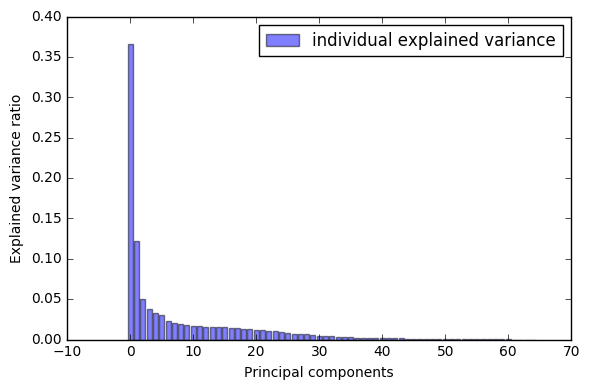

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

y = explained_variance
N = len(y)
x = range(N)

plt.bar(x, y, alpha=0.5, align='center',
            label='individual explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()

In [22]:
explained_variance[0:15].sum()

0.80106345419991321

In [23]:
pca=PCA(n_components=15)
X_new=pca.fit_transform(X)
X_new

array([[ -2.76858265,   2.70548565,   2.38218919, ...,  -0.72832263,
         -1.32687602,   0.51511076],
       [ -2.43902121,   3.50833535,   2.30809222, ...,  -0.43769248,
         -0.7544804 ,   1.28326392],
       [ -2.99628705,   3.7420004 ,   2.44392366, ...,  -0.627901  ,
         -1.45582057,   0.29726438],
       ..., 
       [ -2.33187072,  -1.75555972,   3.28638807, ...,  -0.51050798,
          1.71809622,  -0.57375426],
       [ 13.04858671,   2.98740555,   3.58978111, ...,  -0.66666402,
         -0.24816229,   1.14732792],
       [ 14.40072106,  -1.9993161 ,   3.434963  , ...,  -0.82642698,
          0.87360438,  -1.26621978]])

In [24]:
pca.get_covariance()

array([[  1.29348699e+01,  -1.94675744e-05,  -6.31905714e-05, ...,
         -5.67354453e-03,  -5.60789631e-03,  -3.93762317e-04],
       [ -1.94675744e-05,   1.29348010e+01,   1.66332552e-05, ...,
          1.49341131e-03,   1.47613115e-03,   1.03647569e-04],
       [ -6.31905714e-05,   1.66332552e-05,   1.29348499e+01, ...,
          4.84752297e-03,   4.79143260e-03,   3.36433753e-04],
       ..., 
       [ -5.67354453e-03,   1.49341131e-03,   4.84752297e-03, ...,
          1.33700292e+01,   4.30197189e-01,   3.02065931e-02],
       [ -5.60789631e-03,   1.47613115e-03,   4.79143260e-03, ...,
          4.30197189e-01,   1.33600153e+01,   2.98570745e-02],
       [ -3.93762317e-04,   1.03647569e-04,   3.36433753e-04, ...,
          3.02065931e-02,   2.98570745e-02,   1.29368923e+01]])

In [25]:
explained_variance=pca.explained_variance_ratio_
explained_variance

array([ 0.36566232,  0.12239256,  0.04960042,  0.03806819,  0.03334248,
        0.03033065,  0.02351669,  0.02039368,  0.01890363,  0.01811587,
        0.01728539,  0.01689746,  0.0157184 ,  0.01560238,  0.01517301])

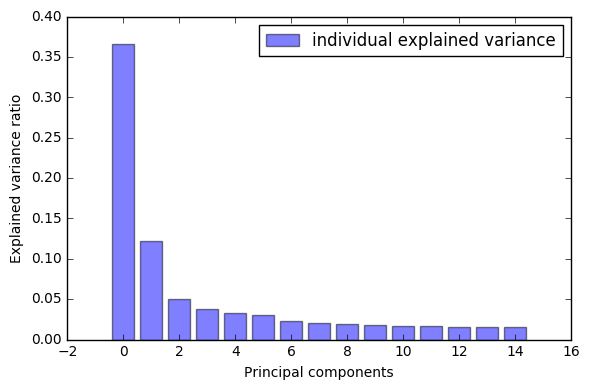

In [26]:
y = explained_variance
N = len(y)
x = range(N)

plt.bar(x, y, alpha=0.5, align='center',
            label='individual explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()

In [27]:
pca = PCA(n_components = 15).fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)


In [28]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

k = 2
while k <= 15:
    # TODO: Apply your clustering algorithm of choice to the reduced data 
    clusterer = KMeans(n_clusters=k, random_state = 9002)

    # TODO: Predict the cluster for each data point
    clusterer.fit(good_data)
    preds = clusterer.predict(good_data)

    # TODO: Find the cluster centers
    centers = clusterer.cluster_centers_

    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data, clusterer.labels_, metric='euclidean')
    print 'K = ' + str(k) + ' silhouette score: ' +str(score)
    k += 1

K = 2 silhouette score: 0.978734435255
K = 3 silhouette score: 0.999779330411
K = 4 silhouette score: 0.823757324512
K = 5 silhouette score: 0.848898528527
K = 6 silhouette score: 0.636640685965
K = 7 silhouette score: 0.54067217466
K = 8 silhouette score: 0.561607979966
K = 9 silhouette score: 0.558051200214
K = 10 silhouette score: 0.515932324179
K = 11 silhouette score: 0.553051321709
K = 12 silhouette score: 0.553802773564
K = 13 silhouette score: 0.527602276029
K = 14 silhouette score: 0.515199687719
K = 15 silhouette score: 0.52695647662


In [31]:
best_clusterer = KMeans(n_clusters=3, random_state = 9002)

# TODO: Predict the cluster for each data point
best_clusterer.fit(reduced_data)
preds = best_clusterer.predict(reduced_data)

# TODO: Find the cluster centers
centers = best_clusterer.cluster_centers_


# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
score = silhouette_score(reduced_data, best_clusterer.labels_, metric='euclidean')
print 'K = 3'  + ' silhouette score: ' +str(score)

K = 3 silhouette score: 0.999779330411


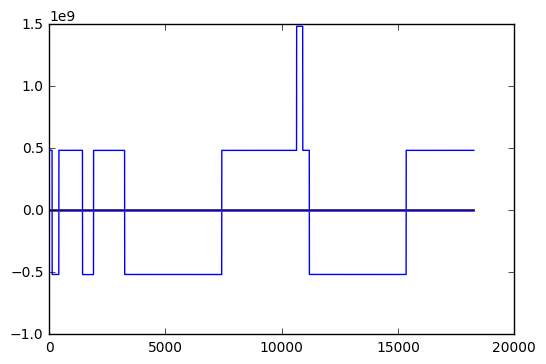

In [38]:
plt.plot(reduced_data)